<a href="https://colab.research.google.com/github/Pavani-Banothu/CodeClause/blob/main/Satellite_images_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
all_ds=tfds.load("eurosat",with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/2.0.0.incomplete6Q9D5P/eurosat-train.tfrecord*...:   0%|      …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


In [ ]:
class_names=all_ds[1].features["label"].names
print(len(class_names))
print(class_names)

10
['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the EuroSAT dataset
(train_ds, test_ds, valid_ds), info = tfds.load(
    "eurosat",
    split=["train[:60%]", "train[60%:80%]", "train[80%:]"],
    as_supervised=True,  # Load data as (image, label) pairs
    with_info=True
)

In [ ]:
print(len(train_ds))

16200


In [ ]:
print(len(test_ds))

5400


In [ ]:
print(len(valid_ds))

5400


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='/root/tensorflow_datasets/eurosat/rgb/2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for i in train_ds.take(1):
  print(i[0])

tf.Tensor(
[[[35 59 71]
  [35 59 71]
  [36 60 72]
  ...
  [32 60 72]
  [31 59 70]
  [33 63 73]]

 [[35 59 71]
  [34 61 72]
  [37 61 73]
  ...
  [31 59 70]
  [31 59 70]
  [33 63 73]]

 [[37 64 73]
  [35 64 72]
  [38 65 74]
  ...
  [35 63 74]
  [31 59 70]
  [32 61 69]]

 ...

 [[31 54 70]
  [29 55 68]
  [32 59 70]
  ...
  [33 62 70]
  [32 60 71]
  [34 62 73]]

 [[33 59 72]
  [32 59 70]
  [32 59 70]
  ...
  [32 60 71]
  [37 66 74]
  [35 65 73]]

 [[34 62 73]
  [33 61 72]
  [35 62 73]
  ...
  [36 64 75]
  [35 65 73]
  [30 60 68]]], shape=(64, 64, 3), dtype=uint8)


In [ ]:
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

Train images


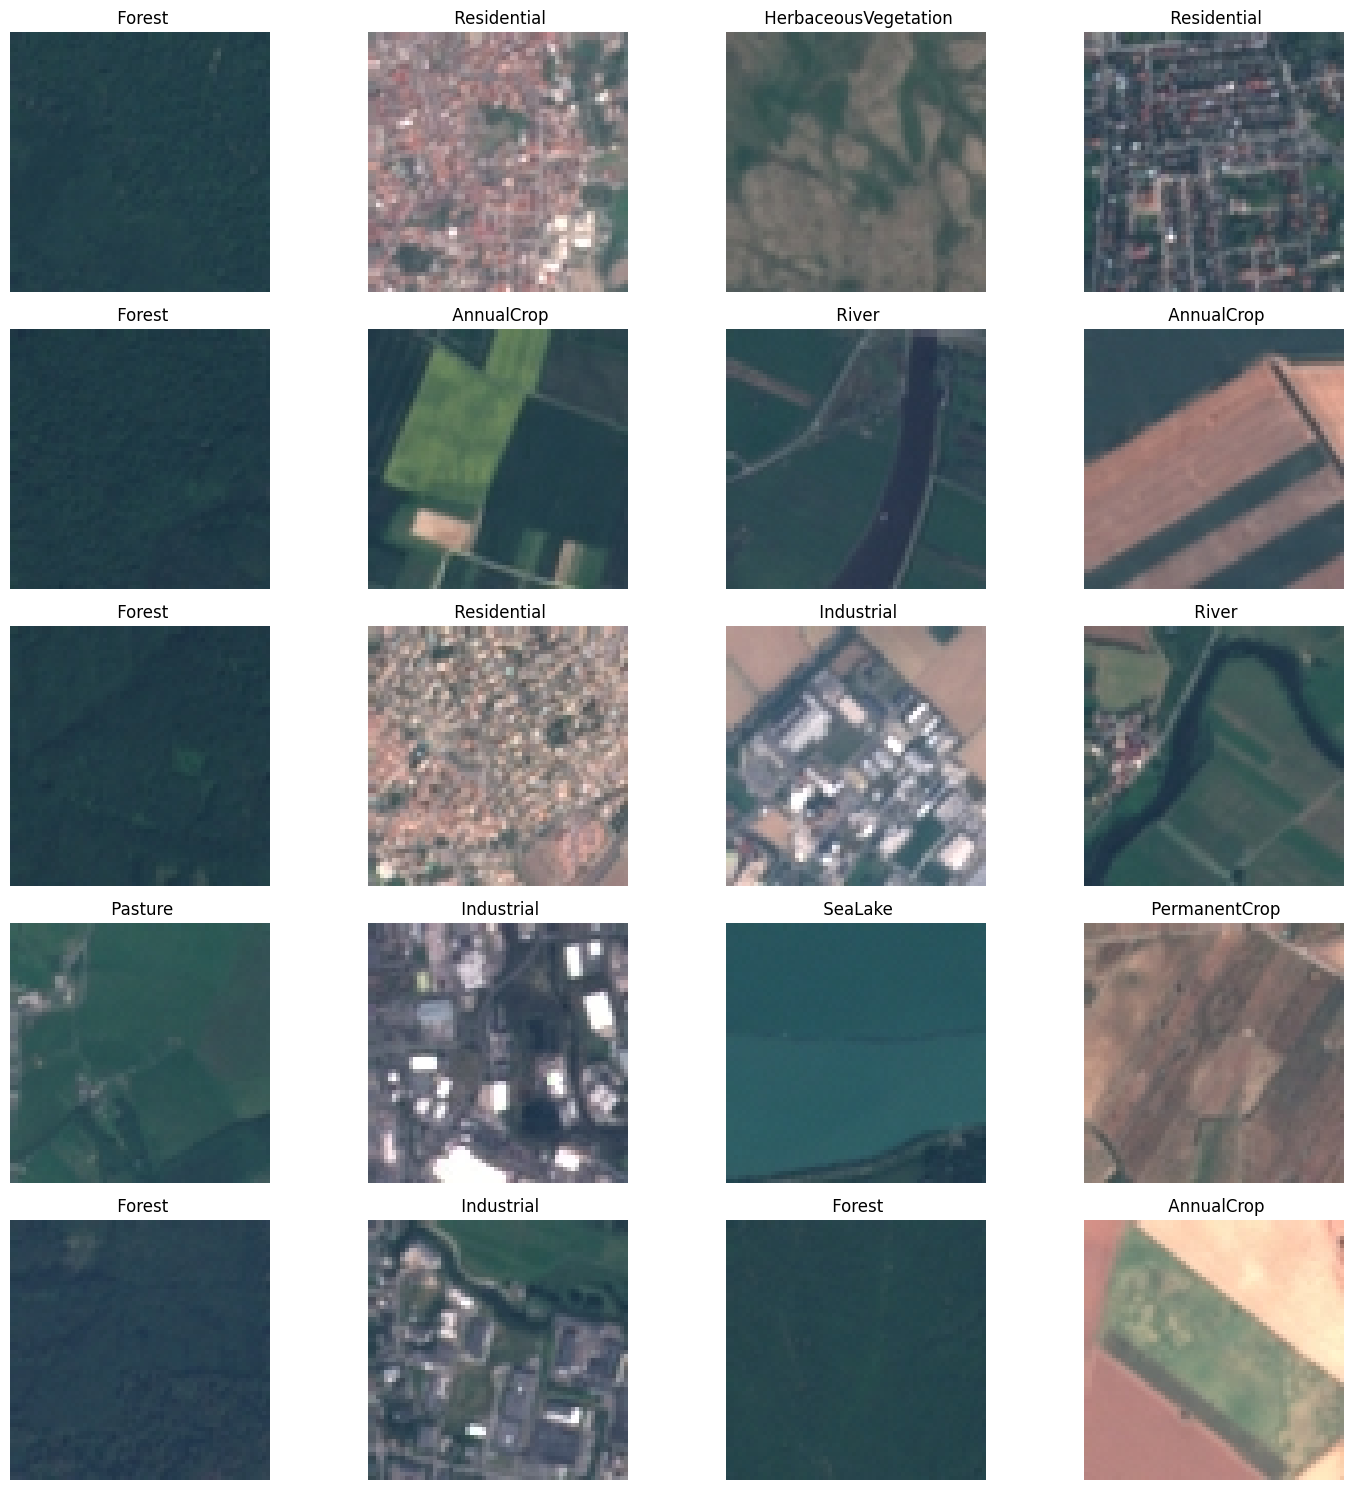

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_columns = 4
num_rows = 5


print("Train images")
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

for i, sample in enumerate(train_ds.take(num_columns * num_rows)):
    image = sample[0].numpy()
    label = sample[1].numpy()

    row = i // num_columns
    col = i % num_columns

    axes[row, col].imshow(image)
    axes[row, col].set_title(f' {class_names[label]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


Test images


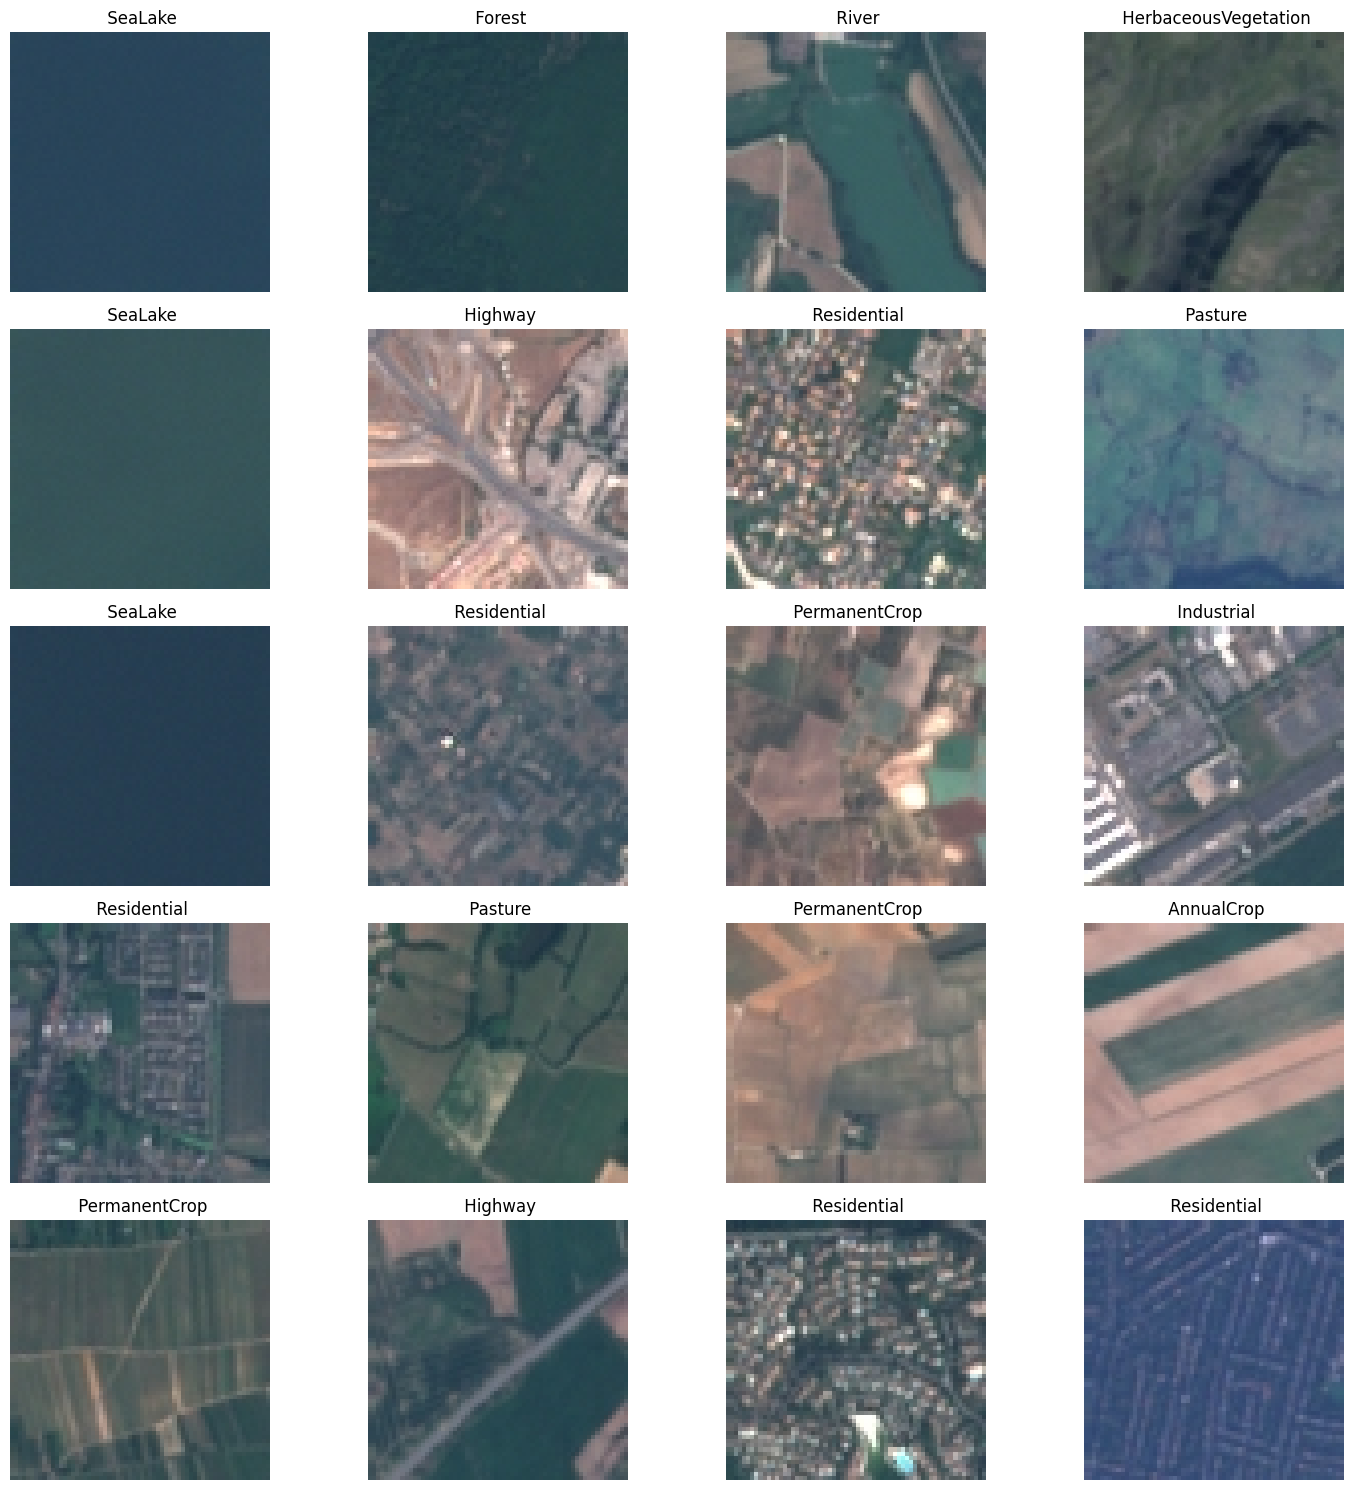

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_columns = 4
num_rows = 5

print("Test images")
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

for i, sample in enumerate(test_ds.take(num_columns * num_rows)):
    image = sample[0].numpy()
    label = sample[1].numpy()

    row = i // num_columns
    col = i % num_columns

    axes[row, col].imshow(image)
    axes[row, col].set_title(f' {class_names[label]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


valid images


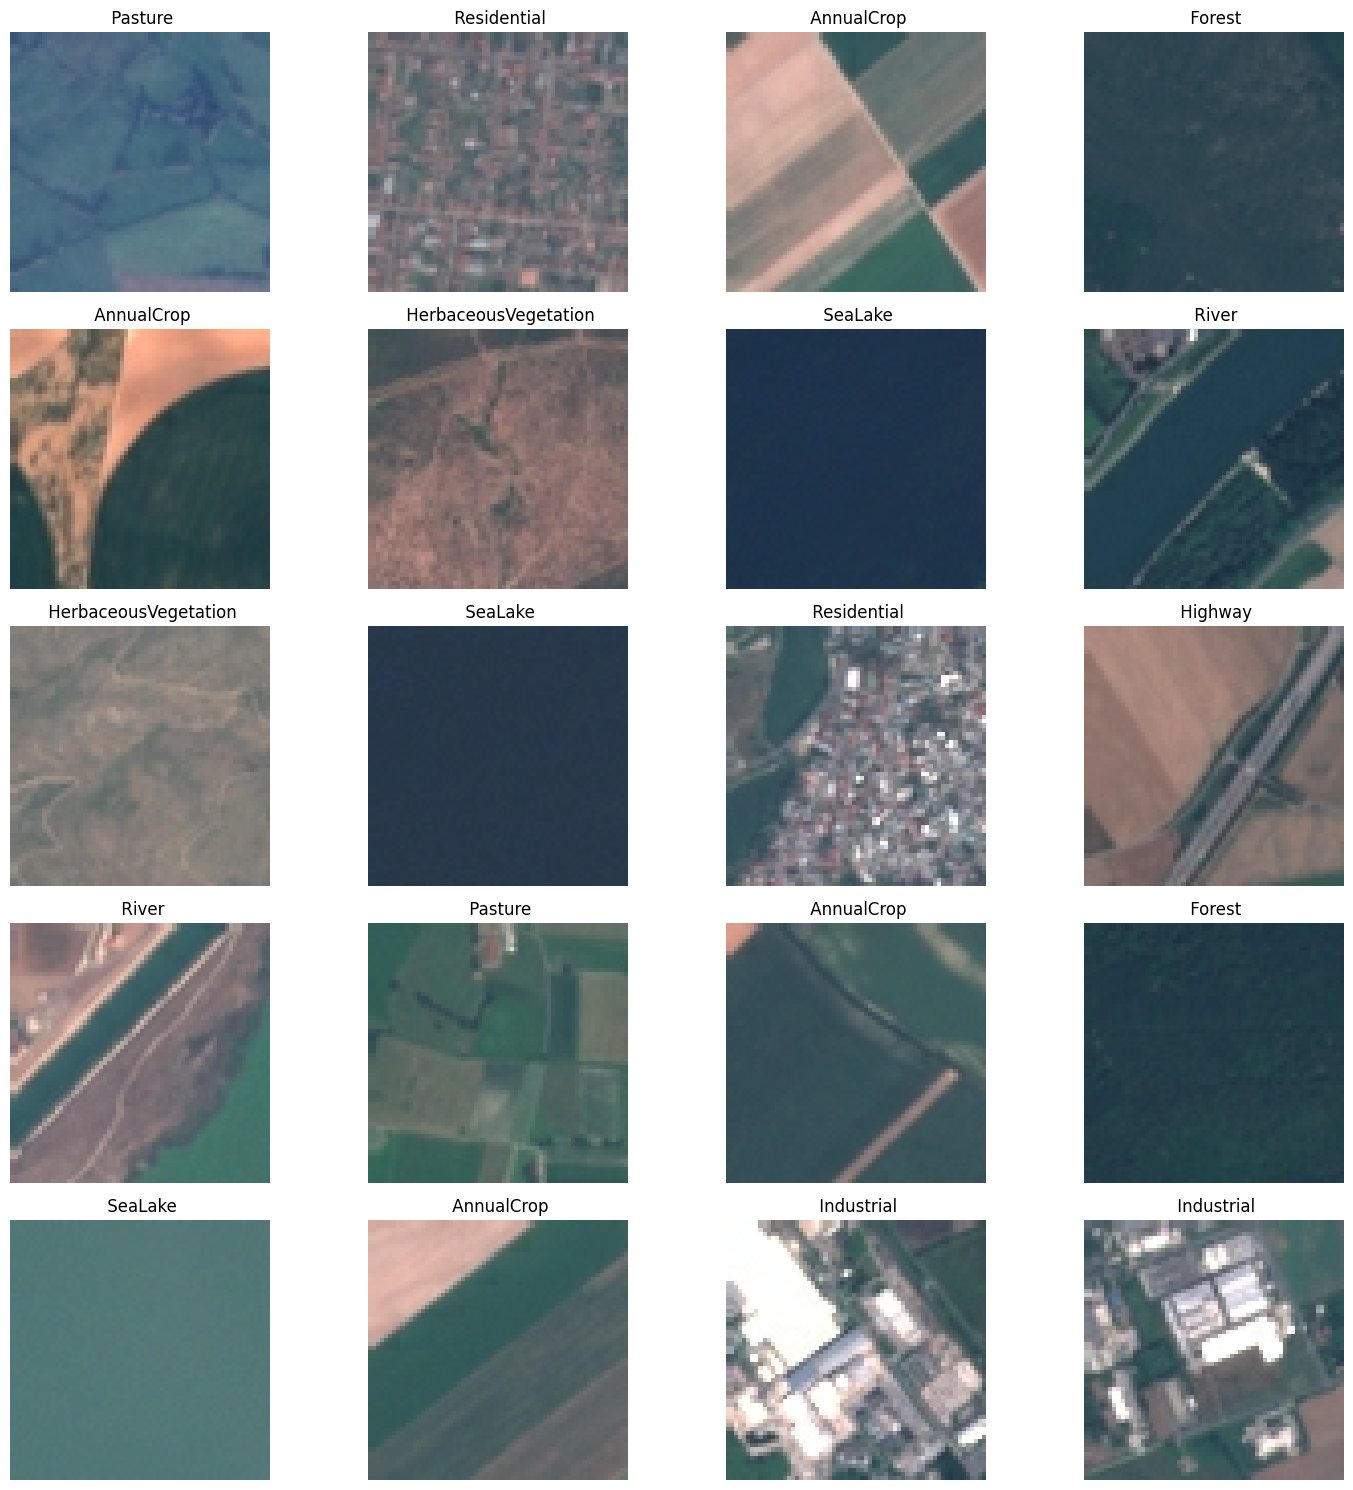

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_columns = 4
num_rows = 5


print("valid images")
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

for i, sample in enumerate(valid_ds.take(num_columns * num_rows)):
    image = sample[0].numpy()
    label = sample[1].numpy()

    row = i // num_columns
    col = i % num_columns

    axes[row, col].imshow(image)
    axes[row, col].set_title(f' {class_names[label]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
valid_ds = valid_ds.batch(batch_size)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(info.features['label'].num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=25)

Epoch 1/25
507/507 [==============================] - 99s 194ms/step - loss: 2.8692 - accuracy: 0.3974 - val_loss: 1.4831 - val_accuracy: 0.4309
Epoch 2/25
507/507 [==============================] - 91s 180ms/step - loss: 1.2673 - accuracy: 0.5333 - val_loss: 1.3985 - val_accuracy: 0.4574
Epoch 3/25
507/507 [==============================] - 94s 186ms/step - loss: 1.0771 - accuracy: 0.6159 - val_loss: 1.5146 - val_accuracy: 0.4833
Epoch 4/25
507/507 [==============================] - 89s 176ms/step - loss: 0.9617 - accuracy: 0.6680 - val_loss: 1.2186 - val_accuracy: 0.6017
Epoch 5/25
507/507 [==============================] - 92s 182ms/step - loss: 0.8126 - accuracy: 0.7181 - val_loss: 1.1698 - val_accuracy: 0.6122
Epoch 6/25
507/507 [==============================] - 91s 181ms/step - loss: 0.7527 - accuracy: 0.7388 - val_loss: 1.2235 - val_accuracy: 0.6265
Epoch 7/25
507/507 [==============================] - 92s 182ms/step - loss: 0.6791 - accuracy: 0.7705 - val_loss: 1.6653 - val_ac

In [ ]:

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

169/169 [==============================] - 5s 31ms/step - loss: 1.2146 - accuracy: 0.7072
Test Loss: 1.2146, Test Accuracy: 70.72%


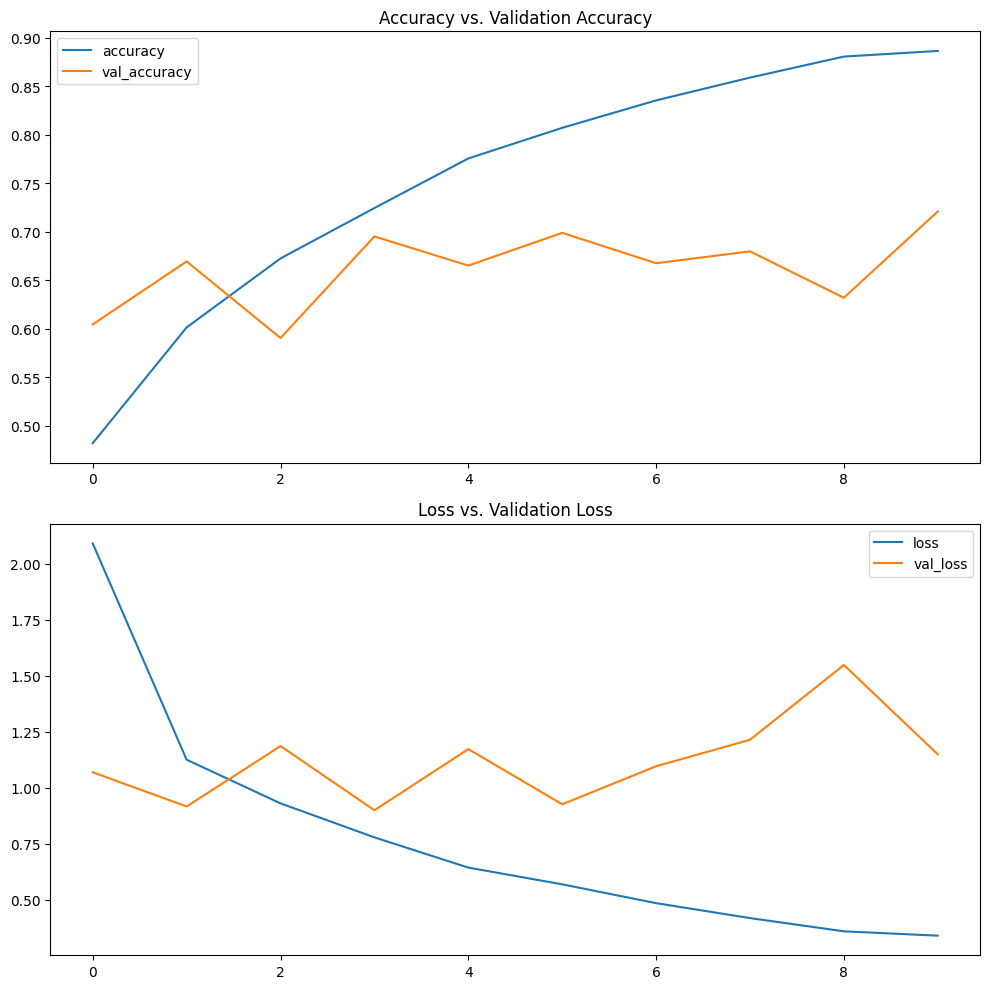

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.title("Accuracy vs. Validation Accuracy")

plt.subplot(2, 1, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss vs. Validation Loss")

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

1/1 [==============================] - 0s 34ms/step


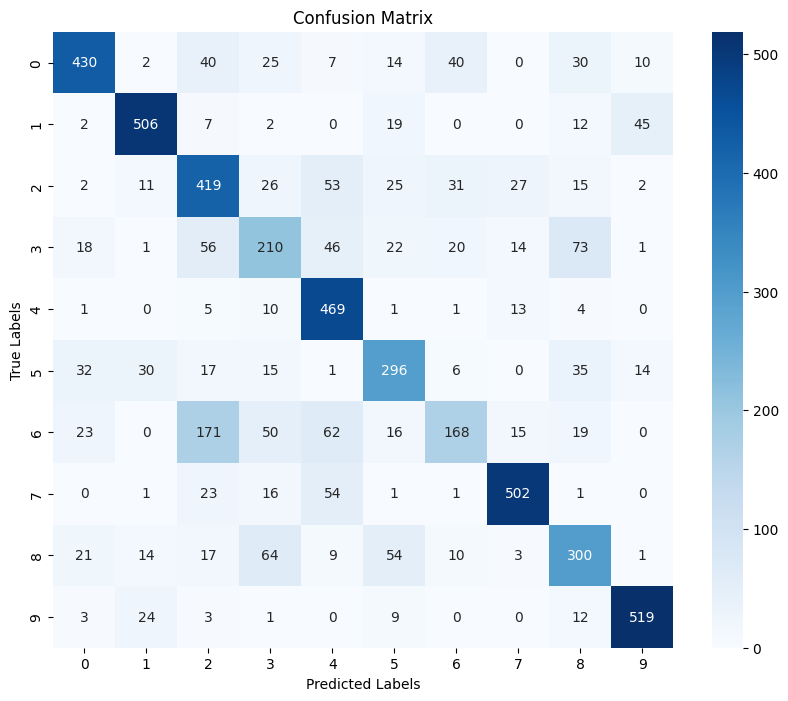

In [ ]:
#  Define lists to store actual and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to make predictions
for images, labels in valid_ds:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())  # Convert labels to numpy array

# Get the unique class labels
class_labels = np.unique(np.concatenate((true_labels, predicted_labels)))

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predicted_labels, labels=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       598
           1       0.86      0.85      0.86       593
           2       0.55      0.69      0.61       611
           3       0.50      0.46      0.48       461
           4       0.67      0.93      0.78       504
           5       0.65      0.66      0.66       446
           6       0.61      0.32      0.42       524
           7       0.87      0.84      0.86       599
           8       0.60      0.61      0.60       493
           9       0.88      0.91      0.89       571

    accuracy                           0.71      5400
   macro avg       0.70      0.70      0.69      5400
weighted avg       0.71      0.71      0.70      5400

